In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow_datasets as tfds

## Load Dataset

In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
tokenizer = info.features['text'].encoder

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8963A6/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8963A6/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete8963A6/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


## Prepare Datasets

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

## Models

In [5]:
model_single = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_single.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
model_multi = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_multi.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_conv.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_gru.summary()


NameError: name 'embedding_dim' is not defined

In [8]:
model_single.summary(
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_multi.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


## Train

In [10]:
NUM_EPOCHS = 10
history_single = model_single.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 64s 163ms/step - loss: 0.5345 - accuracy: 0.7247 - val_loss: 0.4303 - val_accuracy: 0.8150
Epoch 2/10
391/391 [==============================] - 63s 162ms/step - loss: 0.3806 - accuracy: 0.8493 - val_loss: 0.4287 - val_accuracy: 0.8212
Epoch 3/10
391/391 [==============================] - 63s 161ms/step - loss: 0.3103 - accuracy: 0.8807 - val_loss: 0.4179 - val_accuracy: 0.8353
Epoch 4/10
391/391 [==============================] - 63s 162ms/step - loss: 0.2552 - accuracy: 0.9041 - val_loss: 0.4303 - val_accuracy: 0.8266
Epoch 5/10
391/391 [==============================] - 63s 161ms/step - loss: 0.2532 - accuracy: 0.9062 - val_loss: 0.4691 - val_accuracy: 0.8047
Epoch 6/10
391/391 [==============================] - 63s 162ms/step - loss: 0.1914 - accuracy: 0.9306 - val_loss: 0.4924 - val_accuracy: 0.8360
Epoch 7/10
391/391 [==============================] - 62s 160ms/step - loss: 0.1537 - accuracy: 0.9477 - val_loss: 0.5258 - val_ac

In [11]:
NUM_EPOCHS = 10
history_multi = model_multi.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 114s 292ms/step - loss: 0.5061 - accuracy: 0.7500 - val_loss: 0.4858 - val_accuracy: 0.7734
Epoch 2/10
391/391 [==============================] - 113s 289ms/step - loss: 0.3958 - accuracy: 0.8376 - val_loss: 0.4394 - val_accuracy: 0.8220
Epoch 3/10
391/391 [==============================] - 113s 290ms/step - loss: 0.3424 - accuracy: 0.8558 - val_loss: 0.4302 - val_accuracy: 0.8153
Epoch 4/10
391/391 [==============================] - 114s 291ms/step - loss: 0.2390 - accuracy: 0.9121 - val_loss: 0.4376 - val_accuracy: 0.8365
Epoch 5/10
391/391 [==============================] - 113s 290ms/step - loss: 0.1869 - accuracy: 0.9328 - val_loss: 0.5041 - val_accuracy: 0.8107
Epoch 6/10
391/391 [==============================] - 114s 292ms/step - loss: 0.1498 - accuracy: 0.9513 - val_loss: 0.5858 - val_accuracy: 0.8080
Epoch 7/10
391/391 [==============================] - 114s 292ms/step - loss: 0.1688 - accuracy: 0.9417 - val_loss: 0.5839 -

In [ ]:
NUM_EPOCHS = 10
history_conv1d = model_conv.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [ ]:
NUM_EPOCHS = 10
history_gru = model_gru.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

### Single LSTM 

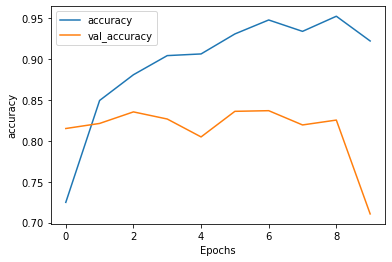

In [13]:
plot_graphs(history_single, 'accuracy')

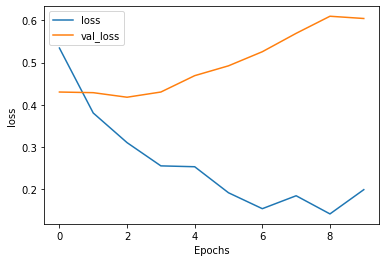

In [16]:
plot_graphs(history_single, 'loss')

## Multi Layer LSTM

In [ ]:
plot_graphs(history_multi, 'accuracy')

In [ ]:
plot_graphs(history_multi, 'loss')

## Conv1D 

In [17]:
 plot_graphs(history_conv1d, 'accuracy')

NameError: name 'history_conv1d' is not defined

In [ ]:
plot_graphs(history_conv1d, 'loss')

### Gru

In [ ]:
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')